In [1]:
# zstandard needs to be imported before graph_tool!!
import zstandard
import graph_tool.all as gt

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

from pygenstability import plotting
from pygenstability.contrib.optimal_scales import *

# Setup MSF

In [3]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration import MSF
from msfiltration.msf_bootstrapping import plot_pds, select_scales_pds, msf_bootstrap

In [4]:
# Set MS parameters
n_time = 200
min_time = -1.5
max_time = 0.5

In [5]:
# number of bootstraps
B = 20
# number of samples for each bootstrap
n_sample = 150

# 2nd real network: EU Airlines

https://networks.skewed.de/net/eu_airlines

In [9]:
# Load network with gt
G_gt = gt.collection.ns["eu_airlines"]

# Extract LCC
G_gt = gt.extract_largest_component(G_gt)

# Get sparse adjacency matrix
A = gt.adjacency(G_gt)

# Import graph to networkx
G = nx.from_scipy_sparse_matrix(A)

In [10]:
# Compute spring layout
pos = nx.spring_layout(G,seed=5)

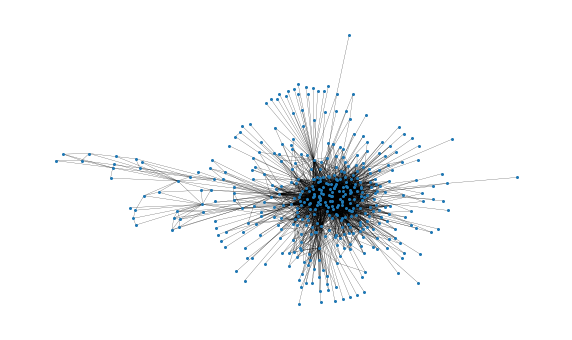

In [11]:
# Plot network
fig, ax = plt.subplots(1,figsize =(10,6))
nx.draw(G,ax=ax,pos=pos, node_size = 4,width = 0.2)

In [17]:
print(G)

Graph with 417 nodes and 2953 edges


### Full MSF

In [12]:
# initialise MSF object
msf = MSF()

# run MS analysis, build filtration and compute PH
msf.fit_transform(A,min_time,max_time,n_time,with_ttprime=True,with_optimal_scales=True)

Running Markov Stability analysis ... 


100%|██████████| 200/200 [03:04<00:00,  1.08it/s]


Building filtration ...


100%|██████████| 200/200 [00:41<00:00,  4.82it/s] 


Computing persistence ... 


In [27]:
# store ms results
root = "/home/tc/OneDrive/Software/MSFiltration/experiments/results/real networks/"
with open(root + "ms_eu_airlines.pkl", "wb") as handle:
    pickle.dump(
        msf.ms_results, handle, protocol=pickle.HIGHEST_PROTOCOL,
    )

In [26]:
# load ms results
with open(root + "ms_eu_airlines.pkl", 'rb') as handle:
        ms_results = pickle.load(handle)

# initialise new MSF object and compute PH
msf = MSF()
msf.load_ms_results(ms_results)
msf.build_filtration()
msf.compute_persistence()

Building filtration ...


100%|██████████| 200/200 [01:05<00:00,  3.05it/s]


Computing persistence ... 


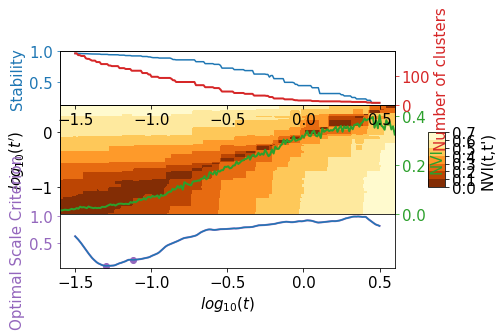

In [30]:
# select optimal scales with nvi
identify_optimal_scales(msf.ms_results,criterion_threshold=0,window_size=20)
selected_scales_nvi = msf.log_times[msf.ms_results['selected_partitions']]
# plot nvi summary of ms
plotting.plot_scan(msf.ms_results)

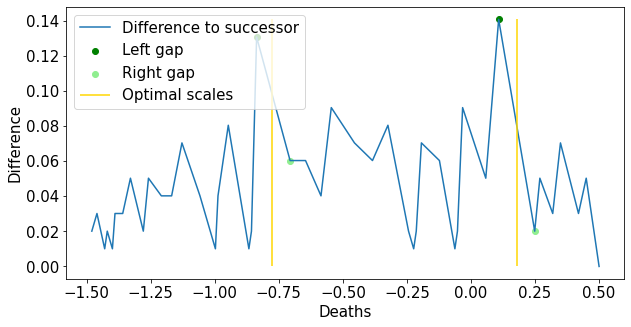

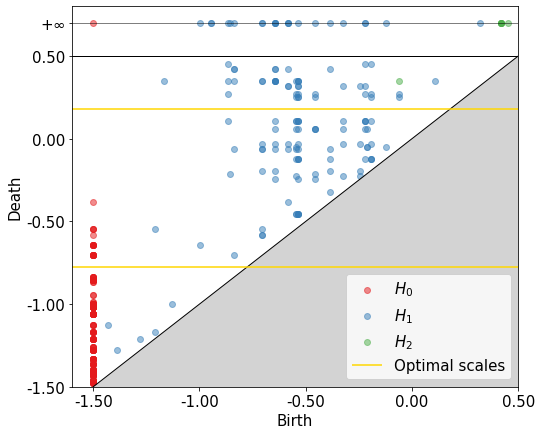

In [20]:
# select optimal scales with ph
msf.select_scales(with_plot=True, threshold_abs=0,min_gap_width=0.105)
# plot persistence diagram with optimal scales
ax = msf.plot_persistence_diagram()

### Bootstrap MSF

In [15]:
persistences_bootstrapped = msf_bootstrap(msf.community_ids, msf.log_times, n_sample, B)

Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 252.40it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 336.50it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 358.97it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 325.68it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 256.91it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 461.60it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 320.73it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 284.71it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 325.38it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 330.85it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 312.98it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 485.48it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 324.05it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 440.38it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 320.52it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 427.90it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 230.51it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:01<00:00, 194.39it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 227.56it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 248.59it/s] 


Computing persistence ... 


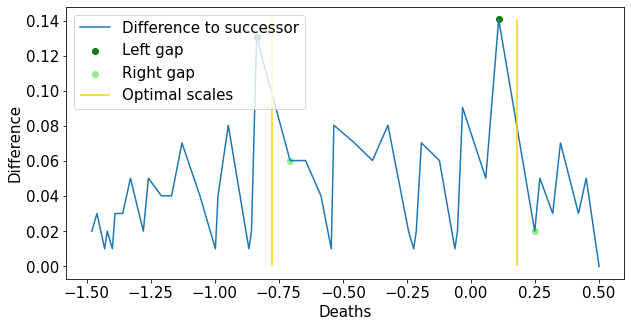

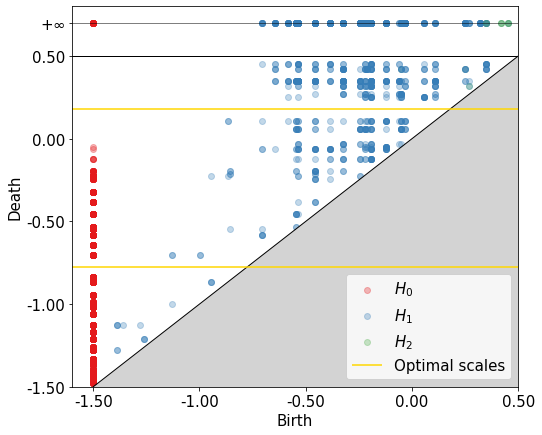

In [19]:
# select optimal scales with ph
optimal_scales_ph, gap_width, ax = select_scales_pds(persistences_bootstrapped, msf.log_times, with_plot=True,threshold_abs=0,min_gap_width=0.105)

# plot optimal scales in PD
fig, ax = plot_pds(persistences_bootstrapped,msf.log_times,optimal_scales_ph,alpha=0.3)